## Imports

In [1]:
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time


from numpy import genfromtxt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from mpl_toolkits.mplot3d import Axes3D



#----------------------------------------------Neural Net Imports
from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
from keras.utils.np_utils import to_categorical

# Linear stack of NN layers
from keras.models import Sequential

# Ensure Fully connected layer 
from keras.layers import Dense
#----------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



num_pixels = 28
%matplotlib inline

Using TensorFlow backend.


In [2]:
# Importing training  data from CSV files
x_train = genfromtxt('Data/Training/x_train_gr_smpl.csv', delimiter=',', skip_header =1)
y_train = genfromtxt('Data/Training/y_train_smpl.csv', delimiter=',', skip_header =1 )

In [3]:
# Importing testing data from CSV files
x_test = genfromtxt('Data/Testing/x_test_gr_smpl.csv', delimiter=',', skip_header =1)
y_test = genfromtxt('Data/Testing/y_test_smpl.csv', delimiter=',', skip_header =1 )

In [4]:
# Check data has been imported correctly 
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(12660, 2304)
(12660,)
(4170, 2304)
(4170,)


## Preprocessing

In [5]:
# Combinging data with labels

y_train = y_train.reshape(12660,1)
train_data_combined = np.append(x_train, y_train, axis=1)

y_test = y_test.reshape(4170,1)
test_data_combined = np.append(x_test, y_test, axis=1)


In [6]:
# Randomises row order in a reproducable way 
np.random.seed(0)
np.random.shuffle(train_data_combined)
np.random.shuffle(test_data_combined)

In [7]:
# Split data and lables that have undergone the same randomization process
x_train = train_data_combined[:,:-1]
y_train = train_data_combined[:, [-1]].reshape(12660,)

x_test = test_data_combined[:,:-1]
y_test = test_data_combined[:, [-1]].reshape(4170,)

In [8]:
# Normalisation of pixels
x_train = x_train.astype('float')/255
x_test  = x_test.astype('float')/255

In [16]:
#  Reducing the number of attributes using opencv's reduce functionality as shown in the second python Lecture
#  As seen in python lectures: https://vision.hw.ac.uk/webapps/blackboard/content/listContent.jsp?course_id=_94419_1&content_id=_3391865_1

x_train = np.apply_along_axis(
        func1d=lambda img: cv2.resize(img.reshape((48,48)), (num_pixels,num_pixels)),
        axis =1, arr = x_train).reshape((-1,num_pixels*num_pixels))

x_test  = np.apply_along_axis(
        func1d=lambda img: cv2.resize(img.reshape((48,48)), (num_pixels,num_pixels)),
        axis =1, arr = x_test).reshape((-1,num_pixels*num_pixels))

In [19]:
x_train.shape

(12660, 784)

In [20]:
# Creating 10 bins for output
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

print(y_train.shape) 
print(y_test.shape)

(12660, 10)
(4170, 10)


## Buiding MLP Architecture

In [21]:
# Specifying Sequential Model
model = Sequential()

In [22]:
# Dense Adds fully connected nodes in each layer 

# Input layer is the number of pixels & their values 

# Layer 1
model.add(Dense(512, activation = 'relu',input_shape=(784,)))

# Layer 2
model.add(Dense(512, activation = 'relu'))

#Output Layer
model.add(Dense(10, activation = 'softmax'))


## Compiling the model

In [23]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


## Training the Model

In [25]:
trained_network_output = model.fit(x_train,y_train, epochs = 20, validation_data = (x_test, y_test))

Train on 12660 samples, validate on 4170 samples
Epoch 1/20
12660/12660 [==============================] - 4s 288us/step - loss: 0.8621 - accuracy: 0.7217 - val_loss: 0.6242 - val_accuracy: 0.7657
Epoch 2/20
12660/12660 [==============================] - 3s 276us/step - loss: 0.3657 - accuracy: 0.8770 - val_loss: 0.5660 - val_accuracy: 0.8525
Epoch 3/20
12660/12660 [==============================] - 3s 259us/step - loss: 0.2958 - accuracy: 0.9026 - val_loss: 0.6497 - val_accuracy: 0.8525
Epoch 4/20
12660/12660 [==============================] - 3s 262us/step - loss: 0.2399 - accuracy: 0.9205 - val_loss: 0.5156 - val_accuracy: 0.8547
Epoch 5/20
12660/12660 [==============================] - 3s 260us/step - loss: 0.1976 - accuracy: 0.9348 - val_loss: 0.4738 - val_accuracy: 0.8719
Epoch 6/20
12660/12660 [==============================] - 3s 268us/step - loss: 0.1740 - accuracy: 0.9445 - val_loss: 0.9311 - val_accuracy: 0.7681
Epoch 7/20
12660/12660 [==============================] - 3s 26

# Evaluation

### Accuracy of training model

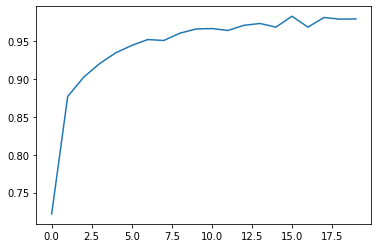

In [27]:
plt.plot(trained_network_output.history['accuracy'])

### Accuracy of training and validation set

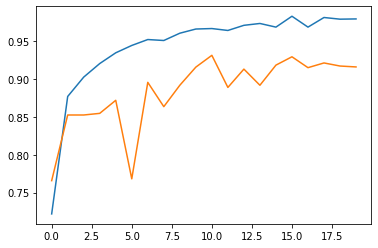

In [29]:
plt.plot(trained_network_output.history['accuracy'])
plt.plot(trained_network_output.history['val_accuracy'])

In [30]:
# Evalutation the model
score = model.evaluate(x_test, y_test)

4170/4170 [==============================] - 0s 49us/step


In [31]:
score
# 91% accuaracy!!!

[0.45147077348485265, 0.9160671234130859]